## Weighted Max-Cut


In [11]:

import pandas as pd
import networkx as nx
data = pd.read_csv('./data/hero-network.csv')
count_series1 = data.groupby(['hero1']).size()
count_series2 = data.groupby(['hero2']).size()
#CAPTION Count the appearences of the heroes in either column

In [2]:
appearences = count_series1.add(count_series2, fill_value=0)
appearences = appearences.sort_values(ascending=False)
#CAPTION Sum the appearences
appearences

CAPTAIN AMERICA         16499.0
SPIDER-MAN/PETER PAR    13717.0
IRON MAN/TONY STARK     11817.0
THOR/DR. DONALD BLAK    11427.0
THING/BENJAMIN J. GR    10681.0
                         ...   
VINDIKTOR/                  1.0
SHAW, MILDRED               1.0
RIPPER/DR. JACQUELIN        1.0
QUASAR                      1.0
GREASE                      1.0
Length: 6426, dtype: float64

In [3]:
n = 12
topheroes = appearences[:n].keys().to_list()
topheroes
#CAPTION Get top n most frequent names

['CAPTAIN AMERICA',
 'SPIDER-MAN/PETER PAR',
 'IRON MAN/TONY STARK ',
 'THOR/DR. DONALD BLAK',
 'THING/BENJAMIN J. GR',
 'WOLVERINE/LOGAN ',
 'HUMAN TORCH/JOHNNY S',
 'SCARLET WITCH/WANDA ',
 'MR. FANTASTIC/REED R',
 'VISION ',
 'INVISIBLE WOMAN/SUE ',
 'BEAST/HENRY &HANK& P']

In [4]:
relations = data[
    (data.hero1.isin(topheroes) &
    data.hero2.isin(topheroes))
]
grouped_relations = relations.groupby(['hero1','hero2']).size().reset_index().rename(columns={0:'count'})
grouped_relations.head()
#CAPTION Select the required data

,hero1,hero2,count
0,BEAST/HENRY &HANK& P,CAPTAIN AMERICA,92
1,BEAST/HENRY &HANK& P,HUMAN TORCH/JOHNNY S,31
2,BEAST/HENRY &HANK& P,INVISIBLE WOMAN/SUE,25
3,BEAST/HENRY &HANK& P,IRON MAN/TONY STARK,76
4,BEAST/HENRY &HANK& P,MR. FANTASTIC/REED R,29


In [5]:
grouped_relations.loc[
    (grouped_relations['hero1'] == 'CAPTAIN AMERICA') &
    (grouped_relations['hero2'] == 'VISION ') |
    (grouped_relations['hero2'] == 'CAPTAIN AMERICA') &
    (grouped_relations['hero1'] == 'VISION ') 
]
#CAPTION Excerpt of the data

,hero1,hero2,count
21,CAPTAIN AMERICA,VISION,180
112,VISION,CAPTAIN AMERICA,205


In [ ]:
relations['relation'] = [' - '.join(x) for x in np.sort(relations.to_numpy(), axis=1)]
#CAPTION Add a unique identifier

In [7]:
summed_relations = relations.groupby(['relation']).size().reset_index().rename(columns={0:'count'})
#CAPTION Summing the row counts

 
\begin{figure}[h]
\begin{board}
\centering
\begin{tabular}{llr}
   &                  relation & count \\
20 & CAPTAIN AMERICA - VISION  &   385
\end{tabular}
\caption{Verify the result}
\end{board}
\end{figure}


In [9]:
summed_relations = pd.merge(summed_relations, relations, on='relation', how='right')
#CAPTION Add the heroes to the dataframe

In [12]:
sub_graph = nx.from_pandas_edgelist(
    summed_relations,
    source='hero1',
    target='hero2',
    edge_attr='count')

print(nx.info(sub_graph))
print("\nNetwork density:", nx.density(sub_graph))
#CAPTION Create the graph structure

Graph with 12 nodes and 67 edges

Network density: 1.0151515151515151


<ipython-input-12-bb908f529bee>:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(sub_graph))


In [13]:
summed_relations.drop(summed_relations[summed_relations['hero1'] == summed_relations['hero2']].index, inplace = True)
#CAPTION Clean the data

In [14]:
sub_graph = nx.from_pandas_edgelist(
    summed_relations,
    source='hero1',
    target='hero2',
    edge_attr='count')

print(nx.info(sub_graph))
print("\nNetwork density:", nx.density(sub_graph))
#CAPTION Create the graph structure on cleaned data

Graph with 12 nodes and 66 edges

Network density: 1.0


<ipython-input-14-6db6a02f44ea>:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(sub_graph))


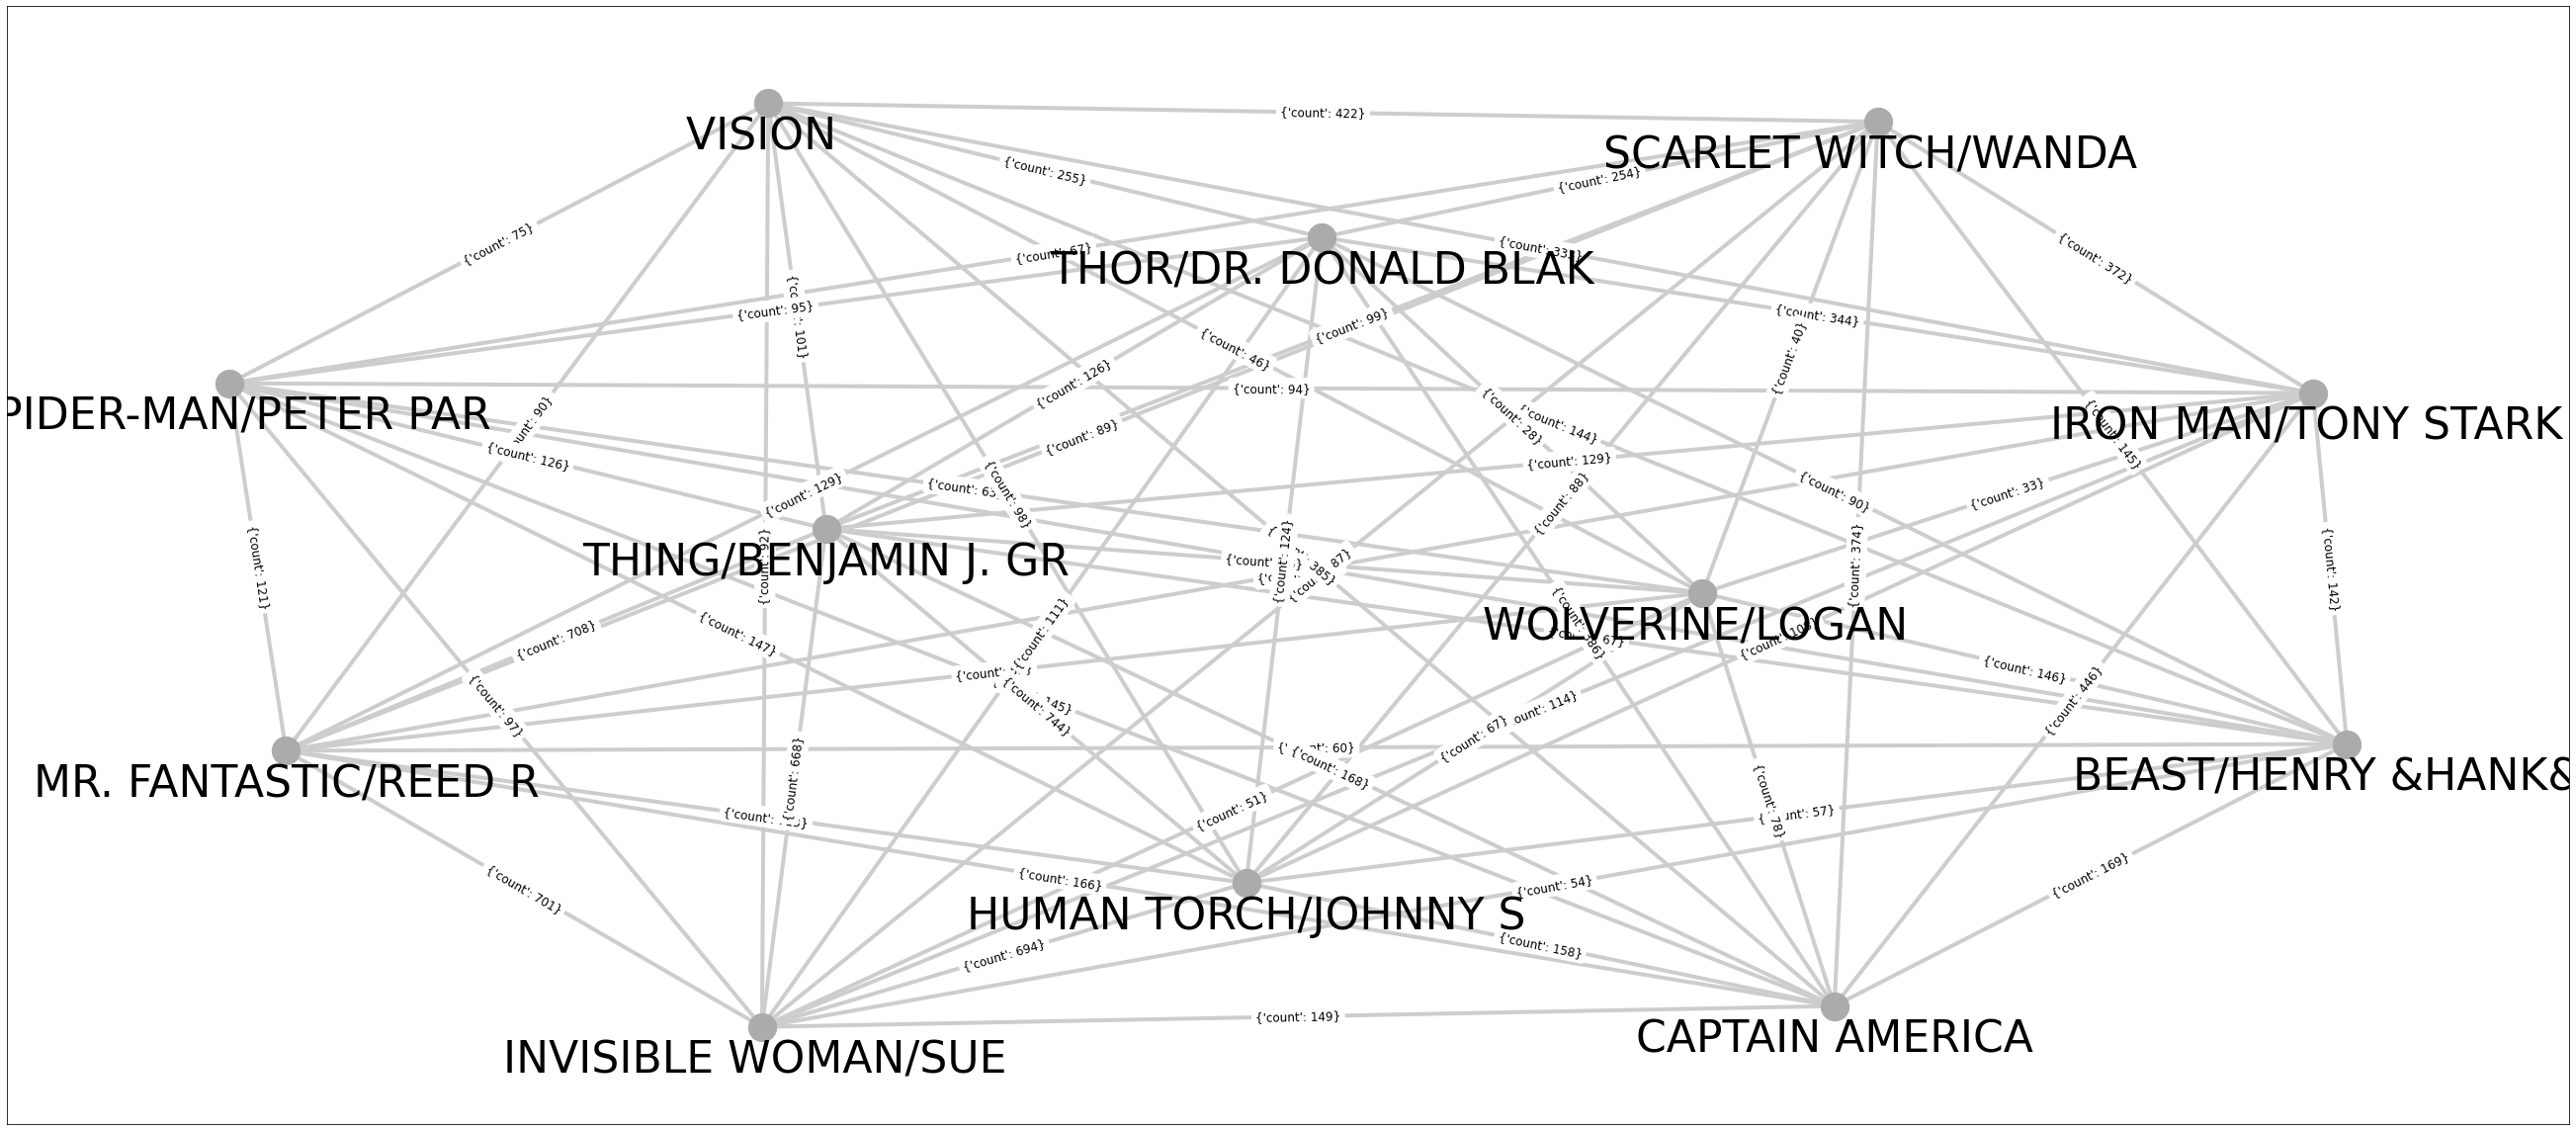

In [15]:
plt.figure(1,figsize=(12,2.5)) 
plt.tight_layout()
plt.subplots_adjust(bottom=-5.4, right=1.5, left=-1.5)

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

pos = nx.spring_layout(sub_graph)
pos_nodes = nudge(pos, 0, -0.07)

nx.draw_networkx_nodes(sub_graph, pos=pos, node_color="#ABABAB", node_size=800)   # default nodes and edges
nx.draw_networkx_edges(sub_graph, pos, width=4, edge_color ="#CDCDCD")
labels=nx.draw_networkx_edge_labels(sub_graph,pos=pos, font_color="#000", font_size=12)
labels=nx.draw_networkx_labels(sub_graph,pos=pos_nodes, font_color="#000", font_size=44)

plt.show()
#CAPTION Visualize the graph

In [16]:
matrix = nx.to_pandas_adjacency(sub_graph, weight="count", dtype=int)
adjacency = matrix.to_numpy()
adjacency
#Create the adjacency matrix

array([[  0, 372, 142, 446,  33, 333, 128, 129, 114, 344,  94, 108],
       [372,   0, 145, 374,  40, 422,  89,  99,  87, 254,  67,  88],
       [142, 145,   0, 169, 146, 144,  60,  67,  54,  90,  51,  57],
       [446, 374, 169,   0,  78, 385, 166, 168, 149, 386, 145, 158],
       [ 33,  40, 146,  78,   0,  46,  53,  76,  51,  28,  63,  67],
       [333, 422, 144, 385,  46,   0,  90, 101,  92, 255,  75,  98],
       [128,  89,  60, 166,  53,  90,   0, 708, 701, 129, 121, 713],
       [129,  99,  67, 168,  76, 101, 708,   0, 668, 126, 126, 744],
       [114,  87,  54, 149,  51,  92, 701, 668,   0, 111,  97, 694],
       [344, 254,  90, 386,  28, 255, 129, 126, 111,   0,  95, 124],
       [ 94,  67,  51, 145,  63,  75, 121, 126,  97,  95,   0, 147],
       [108,  88,  57, 158,  67,  98, 713, 744, 694, 124, 147,   0]])

In [21]:
from qiskit_optimization.applications import Maxcut
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer

max_cut = Maxcut(adjacency)

qp = max_cut.to_quadratic_program()
qubitOp, offset = qp.to_ising()

backend = Aer.get_backend("statevector_simulator")

quantum_instance = QuantumInstance(backend)

qaoa = QAOA(quantum_instance=quantum_instance)

# create minimum eigen optimizer based on qaoa
qaoa_optimizer = MinimumEigenOptimizer(qaoa)

# solve quadratic program
qaoa_optimizer.solve(qp)
#CAPTION Solving the weighted Max-Cut

/usr/local/lib/python3.9/site-packages/qiskit_optimization/algorithms/optimization_algorithm.py:138: UserWarning: The sum of probability of samples is not close to 1: f{sum_prob}
  warn("The sum of probability of samples is not close to 1: f{sum_prob}")


<MinimumEigenOptimizationResult: fval=7765.0, x_0=0.0, x_1=1.0, x_2=1.0, x_3=1.0, x_4=0.0, x_5=0.0, x_6=0.0, x_7=1.0, x_8=1.0, x_9=0.0, x_10=1.0, x_11=0.0, status=SUCCESS>